# Exploratory Data Analysis

setup proprer imports for 
pandas, Matplotlib, and MySQL Connector

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as connection

Use My SQL connector to establish connection to My remote data source 

In [5]:
mydb = connection.connect(host="devcodecamp-mysql.c5p7yvjq1h8y.us-east-2.rds.amazonaws.com", database="salesdb",  user="root",  password="D3v$tudent" , use_pure=True)



As a Data Analyst, I want to query my database to JOIN the information from the sales and cities tables together, and save the result as a single DataFrame variable


In [6]:
select_query = "SELECT * FROM sales, cities "

df = pd.read_sql_query(select_query, mydb)
df.info()


C:\Users\shaun\AppData\Local\Temp\ipykernel_30676\79957463.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(select_query, mydb)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice_ID     3000 non-null   object 
 1   Customer_Type  3000 non-null   object 
 2   Gender         3000 non-null   object 
 3   Product_Line   3000 non-null   object 
 4   Unit_Price     3000 non-null   float64
 5   Quantity       3000 non-null   int64  
 6   Sales_Tax      0 non-null      object 
 7   Total          3000 non-null   float64
 8   Date           3000 non-null   object 
 9   Time           3000 non-null   object 
 10  Payment        3000 non-null   object 
 11  COGS           3000 non-null   float64
 12  Gross_Income   3000 non-null   float64
 13  Rating         3000 non-null   float64
 14  City_ID        3000 non-null   int64  
 15  City           3000 non-null   object 
dtypes: float64(5), int64(2), object(9)
memory usage: 375.1+ KB


As a Data Analyst, I want to perform the necessary data cleaning and wrangling steps for my DataFrame.  

-Exploring the information of the joined DataFrame
-Checking for and removing null values, if necessary
-Checking for and removing duplicate rows, if necessary
-Converting any necessary columns to Pandas DateTime format


In [7]:
df.duplicated().sort_values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice_ID     3000 non-null   object 
 1   Customer_Type  3000 non-null   object 
 2   Gender         3000 non-null   object 
 3   Product_Line   3000 non-null   object 
 4   Unit_Price     3000 non-null   float64
 5   Quantity       3000 non-null   int64  
 6   Sales_Tax      0 non-null      object 
 7   Total          3000 non-null   float64
 8   Date           3000 non-null   object 
 9   Time           3000 non-null   object 
 10  Payment        3000 non-null   object 
 11  COGS           3000 non-null   float64
 12  Gross_Income   3000 non-null   float64
 13  Rating         3000 non-null   float64
 14  City_ID        3000 non-null   int64  
 15  City           3000 non-null   object 
dtypes: float64(5), int64(2), object(9)
memory usage: 375.1+ KB


In [8]:
drop_df = df.drop( ["Sales_Tax", "Time"] , axis=1)
drop_df.head()

,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Payment,COGS,Gross_Income,Rating,City_ID,City
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,3/13/2019,Credit card,320.53,16.0265,7.0,3,Milwaukee
1,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,3/13/2019,Credit card,320.53,16.0265,7.0,2,New York City
2,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,3/13/2019,Credit card,320.53,16.0265,7.0,1,Seattle
3,101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,1/17/2019,Ewallet,125.64,6.2820,4.9,3,Milwaukee
4,101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,1/17/2019,Ewallet,125.64,6.2820,4.9,2,New York City


In [9]:
drop_df["Date"] = pd.to_datetime(drop_df["Date"])
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice_ID     3000 non-null   object        
 1   Customer_Type  3000 non-null   object        
 2   Gender         3000 non-null   object        
 3   Product_Line   3000 non-null   object        
 4   Unit_Price     3000 non-null   float64       
 5   Quantity       3000 non-null   int64         
 6   Total          3000 non-null   float64       
 7   Date           3000 non-null   datetime64[ns]
 8   Payment        3000 non-null   object        
 9   COGS           3000 non-null   float64       
 10  Gross_Income   3000 non-null   float64       
 11  Rating         3000 non-null   float64       
 12  City_ID        3000 non-null   int64         
 13  City           3000 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 328.

In [10]:
drop_df.head()

,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Payment,COGS,Gross_Income,Rating,City_ID,City
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,2019-03-13,Credit card,320.53,16.0265,7.0,3,Milwaukee
1,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,2019-03-13,Credit card,320.53,16.0265,7.0,2,New York City
2,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,2019-03-13,Credit card,320.53,16.0265,7.0,1,Seattle
3,101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,2019-01-17,Ewallet,125.64,6.2820,4.9,3,Milwaukee
4,101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,2019-01-17,Ewallet,125.64,6.2820,4.9,2,New York City


 ### As a Data Analyst, I want to explore my DataFrame to examine the spread of values across categories.  

-How many sales were made for members vs. normal customers?
-How many sales were made at each store location?
-How many sales were made for each product line?
-What is the overall average rating, based on all sales records?


Text(0, 0.5, '')

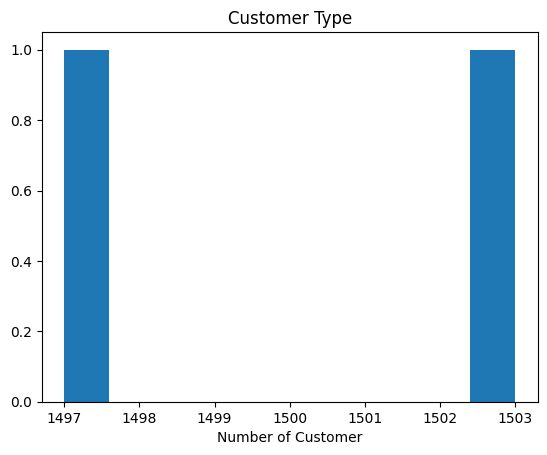

In [11]:
customer_df = drop_df["Customer_Type"].value_counts()
customer_df.plot.hist();
plt.title("Customer Type")
plt.xlabel("Number of Customer")
plt.ylabel("");


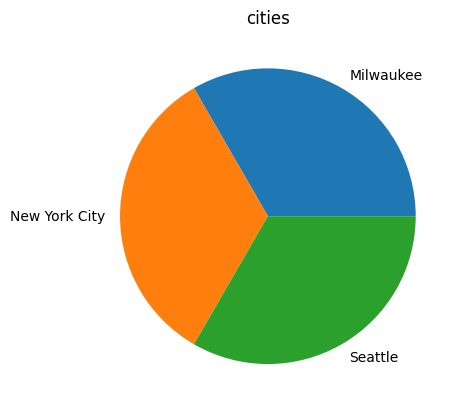

In [36]:
location_df = drop_df["City"].value_counts()
location_df.plot.pie();
plt.title("cities")
plt.ylabel("");

<Axes: title={'center': 'Product Sales'}, ylabel='Product_Line'>

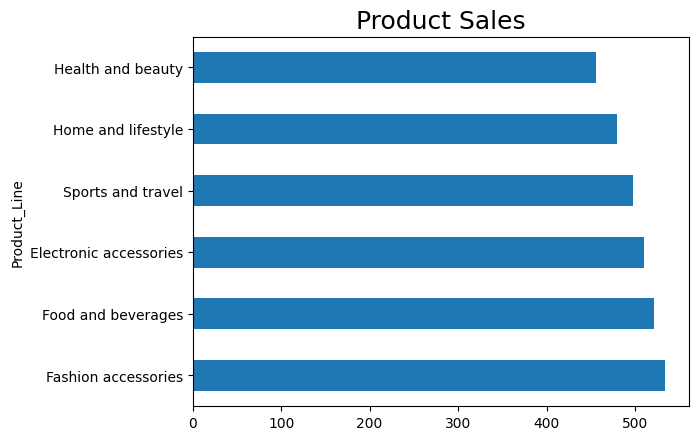

In [13]:
product_df = drop_df["Product_Line"].value_counts()
plt.title("Product Sales",fontsize=18)

plt.ylabel("Procuct Line")

plt.xlabel("Sales")

product_df.plot.barh()


In [14]:
average_df = drop_df["Rating"].value_counts()
average_df

Rating
6.0     78
6.6     72
9.5     66
4.2     66
6.5     63
        ..
5.3     33
4.0     33
8.3     33
4.6     24
10.0    15
Name: count, Length: 61, dtype: int64

As a Data Analyst, I want to create three visualizations of my DataFrame to better understand any trends or patterns within my data set.  These charts will be a type of my choosing, and I can select which variables to analyze.  All three charts should contain the following:
A chart title
X-axis labels, if applicable
Y-axis labels, if applicable


# Exploratory Data Analysis pt2

 As a Data Analyst, I want to set up the proper imports so I have access to the scikit-learn Python library


In [15]:
from sklearn.linear_model import LinearRegression

As a Data Analyst, I want to describe numeric trends in my DataFrame, using the appropriate Pandas function


In [16]:
drop_df.head()

,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Payment,COGS,Gross_Income,Rating,City_ID,City
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,2019-03-13,Credit card,320.53,16.0265,7.0,3,Milwaukee
1,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,2019-03-13,Credit card,320.53,16.0265,7.0,2,New York City
2,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,2019-03-13,Credit card,320.53,16.0265,7.0,1,Seattle
3,101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,2019-01-17,Ewallet,125.64,6.2820,4.9,3,Milwaukee
4,101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,2019-01-17,Ewallet,125.64,6.2820,4.9,2,New York City


In [17]:
 drop_df.describe()


,Unit_Price,Quantity,Total,Date,COGS,Gross_Income,Rating,City_ID
count,3000.000000,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.672130,5.510000,322.966749,2019-02-14 00:05:45.600000,307.587380,15.379369,6.972700,2.000000
min,10.080000,1.000000,10.678500,2019-01-01 00:00:00,10.170000,0.508500,4.000000,1.000000
25%,32.875000,3.000000,124.422375,2019-01-24 00:00:00,118.497500,5.924875,5.500000,1.000000
50%,55.230000,5.000000,253.848000,2019-02-13 00:00:00,241.760000,12.088000,7.000000,2.000000
75%,77.935000,8.000000,471.350250,2019-03-08 00:00:00,448.905000,22.445250,8.500000,3.000000
max,99.960000,10.000000,1042.650000,2019-03-30 00:00:00,993.000000,49.650000,10.000000,3.000000
std,26.485792,2.922456,245.803332,NaN,234.098412,11.704921,1.718007,0.816633


 As a Data Analyst, I want to explore the correlation between columns of my data set, using the appropriate Pandas function
    

In [18]:
drop_df.corr(numeric_only=True)

,Unit_Price,Quantity,Total,COGS,Gross_Income,Rating,City_ID
Unit_Price,1.000000e+00,1.077756e-02,6.339621e-01,6.339621e-01,6.339621e-01,-8.777507e-03,1.210968e-16
Quantity,1.077756e-02,1.000000e+00,7.055102e-01,7.055102e-01,7.055102e-01,-1.581490e-02,-2.699034e-17
Total,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,-3.644170e-02,4.598521e-17
COGS,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,-3.644170e-02,4.322798e-17
Gross_Income,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,-3.644170e-02,4.833404e-17
Rating,-8.777507e-03,-1.581490e-02,-3.644170e-02,-3.644170e-02,-3.644170e-02,1.000000e+00,3.045004e-17
City_ID,1.210968e-16,-2.699034e-17,4.598521e-17,4.322798e-17,4.833404e-17,3.045004e-17,1.000000e+00


As a Data Analyst, I want to reshape my two columns to prepare for fitting to a linear regression model, and save each as its own unique variable

In [30]:
reshaped_x = drop_df[["Quantity"]]
reshaped_y = drop_df["Total"]

 As a Data Analyst, I want to note the columns with the strongest correlation, and visualize those two columns using a Matplotlib Scatter Plot.  I will ensure my plot includes the following:
A chart title
A X-axis label
A Y-axis label


As a Data Analyst, I want to create a new LinearRegression instance, and use the appropriate function to create a predictive model for my Y-axis values.


In [26]:
model= LinearRegression()

y_values = drop_df[["Quantity"]]

x_values = drop_df["Total"]

model.fit(reshaped_x, reshaped_y)

prediction_y_values = model.predict(reshaped_x)

As a Data Analyst, I want to create a visualization of my predictive model, and ensure I include the following stylizations:
A chart title
X-axis label
Y-axis label
A different color line for my predictive model


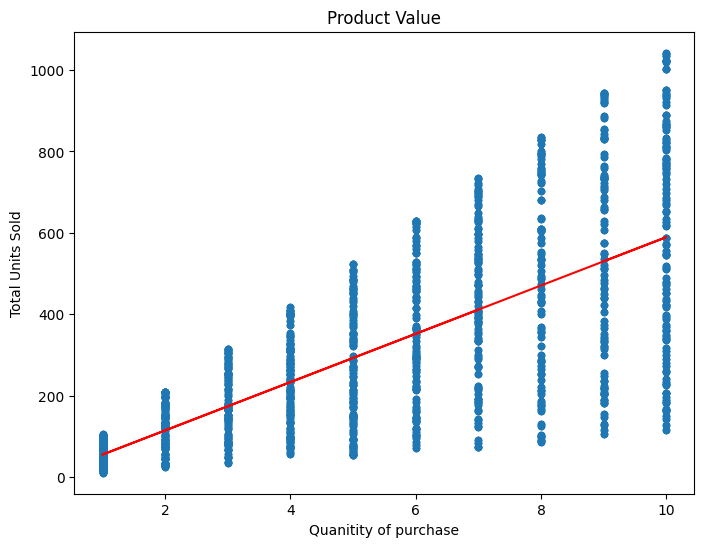

In [35]:
drop_df.plot.scatter(x="Quantity", y="Total", figsize= (8,6))
plt.plot(reshaped_x,prediction_y_values, color="RED")
plt.title("Product Value")
plt.ylabel("Total Units Sold")
plt.xlabel("Quanitity of purchase");



 As a Data Analyst, I want to present my findings as a Level I-style video recording (informal) that is no more than 5-8 minutes and covers the following:
-The completed results of your Jupyter notebook
-Key visualizations generated based off of evaluation questions
-Any other cleaned/wrangled supporting data 
-Communicate any insights you’ve gathered by working with the data
-Make sure to address a specific individual in your video as if you were responding to a request for analysis (you can pick a -fictional person or choose an instructor!)
